In [33]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
fichierClasses= "/mnt/VegaSlowDataDisk/c3po/Images_aquises/Table_Labels_to_Class.csv" # overwritten by --classes myFile
frame=pd.read_csv(fichierClasses,index_col=False)

In [8]:
def to_reference_labels (df,class_colum,frame=frame):

    #flatten list in Labels_File
    cat=[]
    for i in range(len(frame["categories"]) ):
        cat.append( frame["categories"][i] )

    liste = [ast.literal_eval(item) for item in cat]

    # set nouvelle_classe to be the "unified" class name
    for j in range(len(frame["categories"])):
        #classesToReplace = frame["categories"][j].split(",")[0][2:-1]
        className = frame["categories"][j].split(",")[0][2:-1]
        #df["nouvelle_classe"]=df["classe"].replace(classesToReplace,className)
        df[class_colum]=df[class_colum].replace(liste[j],className)

    return df


In [9]:
imagettes=pd.read_csv("/mnt/VegaSlowDataDisk/c3po/Images_aquises/imagettes.csv")
liste_to_keep=["chevreuil","corneille","faisan","lapin","pigeon","oiseau"]
imagettes=to_reference_labels (imagettes,"classe")
imagettes=imagettes[imagettes["classe"].isin(liste_to_keep)]    
liste_name_test=list(imagettes["filename"][imagettes["path"]=='./DonneesPI/timeLapsePhotos_Pi1_0'].unique())

In [14]:
categories=["chevreuil","corneille","faisan","lapin","pigeon","oiseau"]
for animal in categories:
    print(animal,len(imagettes[imagettes["classe"]==animal]))

chevreuil 136
corneille 1074
faisan 335
lapin 177
pigeon 828
oiseau 218


In [15]:
bi_birds=imagettes[imagettes["classe"].isin(["corneille","pigeon"])]

In [24]:
bi_birds["area"]=(bi_birds["xmax"]-bi_birds["xmin"])*(bi_birds["ymax"]-bi_birds["ymin"])


/home/marcpozzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
bi_birds

,path,filename,width,height,classe,xmin,ymin,xmax,ymax,index,imagetteName,area
2,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0180.JPG,5200,3900,corneille,2842,2731,2876,2767,2,DSCF0180_corneille_2.JPG,1224
3,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0180.JPG,5200,3900,corneille,2799,2731,2833,2767,3,DSCF0180_corneille_3.JPG,1224
4,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0258.JPG,5200,3900,pigeon,3249,2638,3541,3286,4,DSCF0258_pigeon_4.JPG,189216
8,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0335.JPG,5200,3900,pigeon,2315,3463,2409,3532,8,DSCF0335_pigeon_8.JPG,6486
10,./TGO 2019 - photos caméras/Parcelle 1 Guilbot...,DSCF0341.JPG,5200,3900,pigeon,3247,2947,3313,2978,10,DSCF0341_pigeon_10.JPG,2046
...,...,...,...,...,...,...,...,...,...,...,...,...
6210,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-03.jpg,1280,720,pigeon,966,407,983,419,6210,image_2019-04-30_18-55-03_pigeon_6210.JPG,204
6212,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-20.jpg,1280,720,corneille,236,494,244,502,6212,image_2019-04-30_18-55-20_corneille_6212.JPG,64
6214,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-20.jpg,1280,720,pigeon,405,496,415,508,6214,image_2019-04-30_18-55-20_pigeon_6214.JPG,120
6216,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-20.jpg,1280,720,pigeon,625,423,633,431,6216,image_2019-04-30_18-55-20_pigeon_6216.JPG,64


In [31]:
bi_birds["path"].unique()

path_to_keep=['./DonneesPI/timeLapsePhotos_Pi1_4',
       './DonneesPI/timeLapsePhotos_Pi1_3',
       './DonneesPI/timeLapsePhotos_Pi1_2',
       './DonneesPI/timeLapsePhotos_Pi1_1',
       './DonneesPI/timeLapsePhotos_Pi1_0']

bi_birds=bi_birds[bi_birds['path'].isin(path_to_keep)]

In [32]:
bi_birds

,path,filename,width,height,classe,xmin,ymin,xmax,ymax,index,imagetteName,area
724,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-46-54.jpg,1280,720,corneille,709,305,722,317,724,image_2019-06-14_15-46-54_corneille_724.JPG,156
726,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-46-54.jpg,1280,720,corneille,762,313,774,324,726,image_2019-06-14_15-46-54_corneille_726.JPG,132
728,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-47-11.jpg,1280,720,corneille,755,293,774,308,728,image_2019-06-14_15-47-11_corneille_728.JPG,285
729,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-47-11.jpg,1280,720,corneille,858,287,875,304,729,image_2019-06-14_15-47-11_corneille_729.JPG,289
732,./DonneesPI/timeLapsePhotos_Pi1_4,image_2019-06-14_15-47-28.jpg,1280,720,corneille,828,283,841,293,732,image_2019-06-14_15-47-28_corneille_732.JPG,130
...,...,...,...,...,...,...,...,...,...,...,...,...
6210,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-03.jpg,1280,720,pigeon,966,407,983,419,6210,image_2019-04-30_18-55-03_pigeon_6210.JPG,204
6212,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-20.jpg,1280,720,corneille,236,494,244,502,6212,image_2019-04-30_18-55-20_corneille_6212.JPG,64
6214,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-20.jpg,1280,720,pigeon,405,496,415,508,6214,image_2019-04-30_18-55-20_pigeon_6214.JPG,120
6216,./DonneesPI/timeLapsePhotos_Pi1_0,image_2019-04-30_18-55-20.jpg,1280,720,pigeon,625,423,633,431,6216,image_2019-04-30_18-55-20_pigeon_6216.JPG,64


(array([1306.,  138.,   60.,   41.,   16.,   24.,   17.,    3.,    2.,
           2.]),
 array([  15.,  393.,  771., 1149., 1527., 1905., 2283., 2661., 3039.,
        3417., 3795.]),
 <a list of 10 Patch objects>)

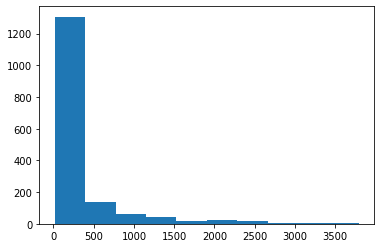

In [34]:
plt.hist(bi_birds["area"])

In [41]:
len(bi_birds[bi_birds["area"]>2000])

42

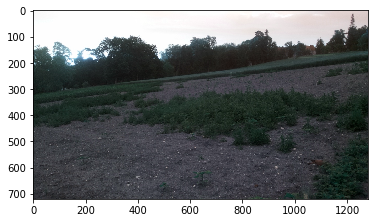

In [37]:
import cv2
im=cv2.imread("/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_4/image_2019-06-15_04-15-05.jpg")
plt.imshow(im)

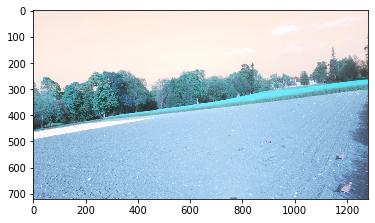

In [38]:

im=cv2.imread("/mnt/VegaSlowDataDisk/c3po/Images_aquises/DonneesPI/timeLapsePhotos_Pi1_0/image_2019-04-30_18-50-03.jpg")
plt.imshow(im)